In [49]:
import nltk
from nltk.corpus import gutenberg as gu
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from matplotlib.colors import ListedColormap
import numpy as np
import numpy.linalg as la
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

In [12]:
# Sherlock file open
with open("Sherlock.txt", "r") as f:
    sherlock = f.read()


UnicodeDecodeError: 'cp949' codec can't decode byte 0xbf in position 2: illegal multibyte sequence

In [25]:
tokenizer = RegexpTokenizer(r'\w+') #문장기호 제거하기
mycor = 'C:\world_news'
files = PlaintextCorpusReader(mycor , '.*')
a = files.raw('doyle_fear.txt') #돌레 소설 읽어오기
slw = tokenizer.tokenize(a.lower()) #제거된 돌레

In [41]:
slw

['the',
 'valley',
 'of',
 'fear',
 'by',
 'sir',
 'arthur',
 'conan',
 'doyle',
 'part',
 '1',
 'the',
 'tragedy',
 'of',
 'birlstone',
 'chapter',
 '1',
 'the',
 'warning',
 'i',
 'am',
 'inclined',
 'to',
 'think',
 'said',
 'i',
 'i',
 'should',
 'do',
 'so',
 'sherlock',
 'holmes',
 'remarked',
 'impatiently',
 'i',
 'believe',
 'that',
 'i',
 'am',
 'one',
 'of',
 'the',
 'most',
 'long',
 'suffering',
 'of',
 'mortals',
 'but',
 'i',
 'll',
 'admit',
 'that',
 'i',
 'was',
 'annoyed',
 'at',
 'the',
 'sardonic',
 'interruption',
 'really',
 'holmes',
 'said',
 'i',
 'severely',
 'you',
 'are',
 'a',
 'little',
 'trying',
 'at',
 'times',
 'he',
 'was',
 'too',
 'much',
 'absorbed',
 'with',
 'his',
 'own',
 'thoughts',
 'to',
 'give',
 'any',
 'immediate',
 'answer',
 'to',
 'my',
 'remonstrance',
 'he',
 'leaned',
 'upon',
 'his',
 'hand',
 'with',
 'his',
 'untasted',
 'breakfast',
 'before',
 'him',
 'and',
 'he',
 'stared',
 'at',
 'the',
 'slip',
 'of',
 'paper',
 'which',


In [23]:
# 문장기호(punctuation) 제거
cbw = [w.lower() for w in gu.words('chesterton-brown.txt') if w[0].isalpha()]

In [40]:
cbw

['the',
 'wisdom',
 'of',
 'father',
 'brown',
 'by',
 'g',
 'k',
 'chesterton',
 'i',
 'the',
 'absence',
 'of',
 'mr',
 'glass',
 'the',
 'consulting',
 'rooms',
 'of',
 'dr',
 'orion',
 'hood',
 'the',
 'eminent',
 'criminologist',
 'and',
 'specialist',
 'in',
 'certain',
 'moral',
 'disorders',
 'lay',
 'along',
 'the',
 'sea',
 'front',
 'at',
 'scarborough',
 'in',
 'a',
 'series',
 'of',
 'very',
 'large',
 'and',
 'well',
 'lighted',
 'french',
 'windows',
 'which',
 'showed',
 'the',
 'north',
 'sea',
 'like',
 'one',
 'endless',
 'outer',
 'wall',
 'of',
 'blue',
 'green',
 'marble',
 'in',
 'such',
 'a',
 'place',
 'the',
 'sea',
 'had',
 'something',
 'of',
 'the',
 'monotony',
 'of',
 'a',
 'blue',
 'green',
 'dado',
 'for',
 'the',
 'chambers',
 'themselves',
 'were',
 'ruled',
 'throughout',
 'by',
 'a',
 'terrible',
 'tidiness',
 'not',
 'unlike',
 'the',
 'terrible',
 'tidiness',
 'of',
 'the',
 'sea',
 'it',
 'must',
 'not',
 'be',
 'supposed',
 'that',
 'dr',
 'hood

# 많이 쓰인 상위 50개 단어 추출해서 top50 변수에 저장

In [43]:
top50 = nltk.FreqDist(cbw+slw).most_common(50)
# cbw_top50 = nltk.FreqDist(cbw).most_common(50)

In [46]:
# 각 작가별로 top50에 해당하는 단어가 작품에 몇 개나 나오는지 세서 M에 저장한다
M = []

for corp in [slw, cbw]:
    for i in range(len(corp)//5000):
        words = [w for w in corp[5000*i:5000*(i+1)] if w in top50]
        fdist = nltk.FreqDist(words)
        M.append([fdist[w] for w in top50])

In [47]:
M

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [34]:
len(cbw)

73286

Text(0.5,1,'means')

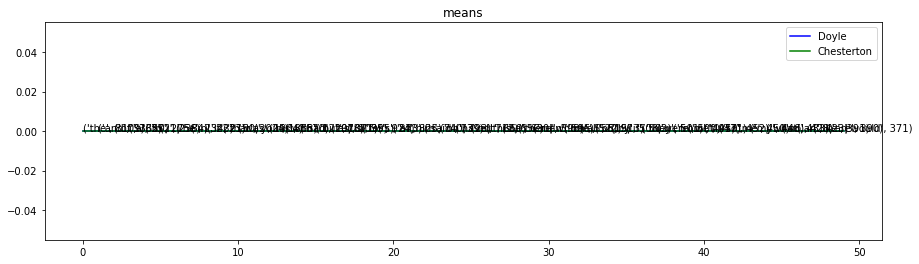

In [50]:
# 단어 평균 빈도 그래프
plt.figure(figsize=(15,4))
plt.plot(np.mean(M[:12],axis=0),'b')
plt.plot(np.mean(M[12:],axis=0),'g')

for i in range(50):
    plt.text(i,np.mean(M[12:],axis=0)[i],top50[i])

plt.legend(['Doyle', 'Chesterton'])
plt.title('means')